## OLS Regression: AirBnb Housing Dataset

In [1]:
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('final_housing_data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
print(data.shape)

(1342, 54)


In [3]:
data.columns

Index(['calculated_host_listings_count', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'days_past_last_review', 'bathrooms',
       'bedrooms', 'beds', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
       'accommodates', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'Seniority_days',
       'instant_bookable_0', 'instant_bookable_1',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'require_guest_profile_picture_0',
       'require_guest_profile_picture_1', 'require_guest_phone_verification_0',
       'require_guest_phone_verification_1', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'has_availability_1', 'p

In [4]:
data = pd.DataFrame(data[data.maximum_nights <= 365])
data.to_csv('final_housing_data.csv')
data.head()

,calculated_host_listings_count,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,days_past_last_review,bathrooms,bedrooms,...,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_0.0,host_is_superhost_1.0,host_has_profile_pic_0,host_has_profile_pic_1,host_has_profile_pic_1.1,host_identity_verified_0,host_identity_verified_1
0,2.0,207.0,95.0,10.0,10.0,10.0,10.0,1847.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1
1,6.0,43.0,96.0,10.0,10.0,10.0,10.0,862.0,1.0,1.0,...,1,0,0,0,1,0,1,0,0,1
2,2.0,20.0,97.0,10.0,10.0,10.0,10.0,222.0,4.5,5.0,...,1,0,0,1,0,0,1,0,0,1
3,1.0,17.0,95.0,10.0,10.0,10.0,10.0,-39.0,1.0,1.0,...,0,1,0,1,0,0,1,0,0,1
4,1.0,58.0,99.0,10.0,10.0,10.0,10.0,531.0,1.0,1.0,...,0,1,0,0,1,0,1,0,0,1


In [5]:
data.isnull().sum()

calculated_host_listings_count        0
number_of_reviews                     0
review_scores_rating                  0
review_scores_accuracy                0
review_scores_cleanliness             0
review_scores_checkin                 0
review_scores_communication           0
days_past_last_review                 0
bathrooms                             0
bedrooms                              0
beds                                  0
price                                 0
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
latitude                              0
longitude                             0
accommodates                          0
host_response_rate                    0
host_acceptance_rate                  0
host_listings_count                   0
host_total_listings_count             0
Seniority_days                        0
instant_bookable_0                    0


In [6]:
housing_df = data.drop('price',axis=1)

In [7]:
feature_names = np.array(['calculated_host_listings_count', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'days_past_last_review', 'bathrooms',
       'bedrooms', 'beds','guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
       'accommodates', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'Seniority_days',
       'instant_bookable_0', 'instant_bookable_1',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'require_guest_profile_picture_0',
       'require_guest_profile_picture_1', 'require_guest_phone_verification_0',
       'require_guest_phone_verification_1', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'property_type_Apartment',
       'property_type_Condominium', 'property_type_House',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_0.0',
       'host_is_superhost_1.0', 'host_has_profile_pic_0',
       'host_has_profile_pic_1', 'host_has_profile_pic_1.1',
       'host_identity_verified_0', 'host_identity_verified_1'])

In [8]:
features_df =  pd.DataFrame(data=housing_df,columns=feature_names)
target_df = pd.DataFrame(data=data,columns=['price'])
target_df

,price
0,85.0
1,150.0
2,975.0
3,120.0
4,80.0
...,...
1337,120.0
1338,154.0
1339,95.0
1340,79.0


In [9]:
data.columns

Index(['calculated_host_listings_count', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'days_past_last_review', 'bathrooms',
       'bedrooms', 'beds', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
       'accommodates', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'Seniority_days',
       'instant_bookable_0', 'instant_bookable_1',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'require_guest_profile_picture_0',
       'require_guest_profile_picture_1', 'require_guest_phone_verification_0',
       'require_guest_phone_verification_1', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'has_availability_1', 'p

In [10]:
#Create analytical data set
#Create dataframe from feature_names
housing_df = data.drop('price',axis=1)
features_df =  pd.DataFrame(data=housing_df,columns=feature_names)
#Create dataframe from target
target_df = pd.DataFrame(data=data,columns=['price'])

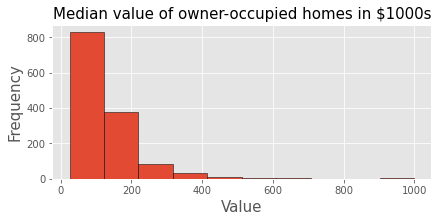

In [11]:
#Exploratory Data Analysis
plt.style.use('ggplot')
# Histogram of target: price     
target_df['price'].plot(kind='hist',edgecolor='black',figsize=(6,3))
plt.title('Median value of owner-occupied homes in $1000s', size=15)
plt.xlabel('Value', size=15)
plt.ylabel('Frequency', size=15) 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<ipython-input-12-3cf0576e37b3>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 3))


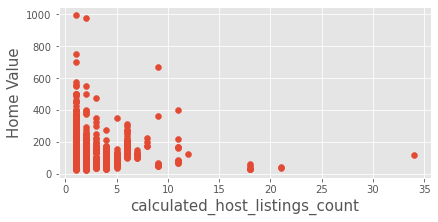

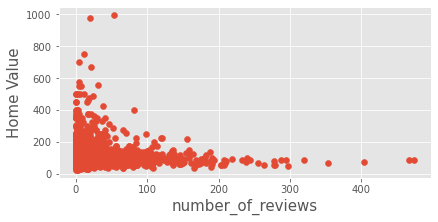

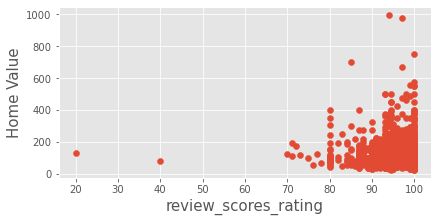

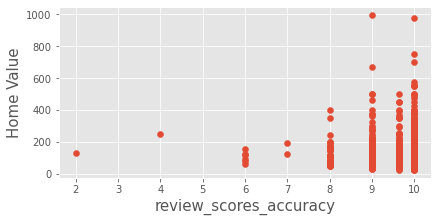

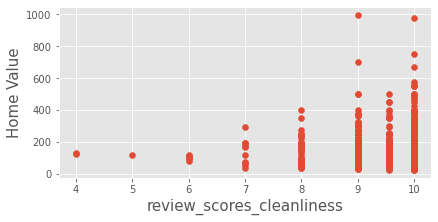

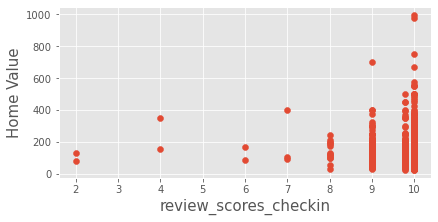

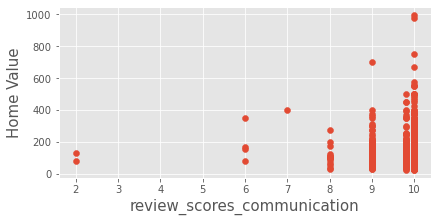

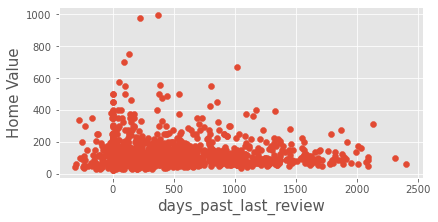

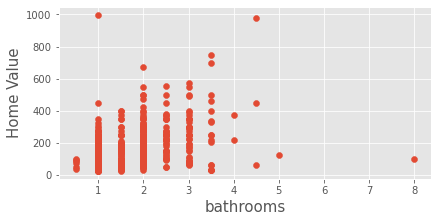

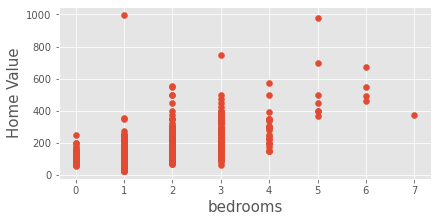

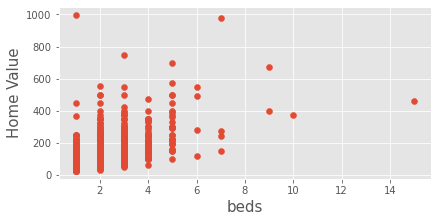

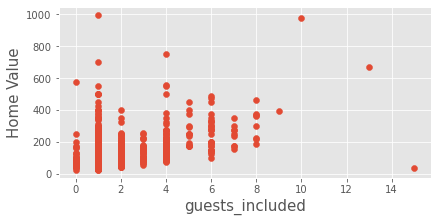

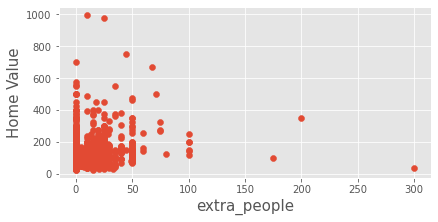

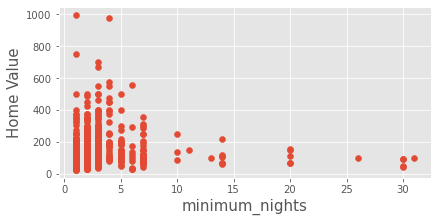

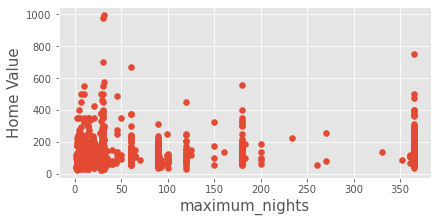

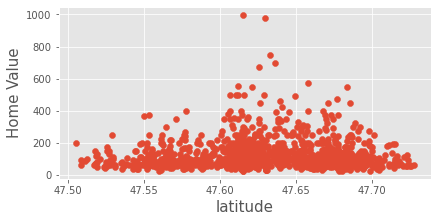

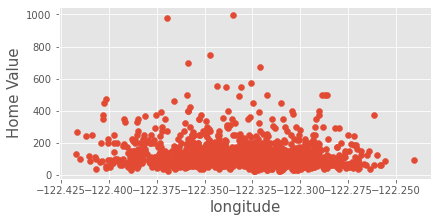

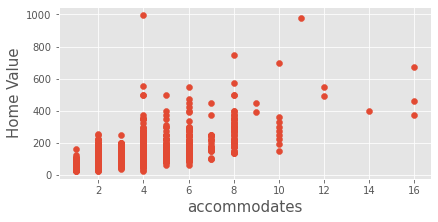

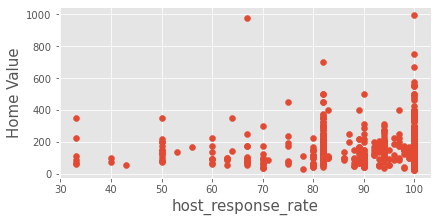

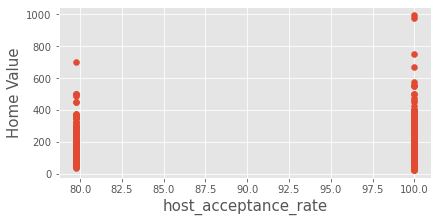

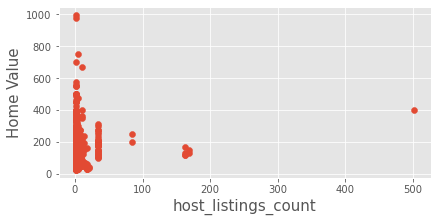

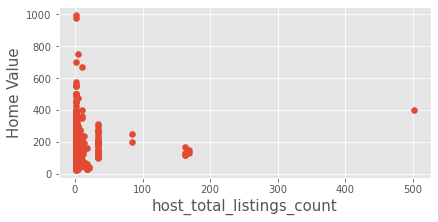

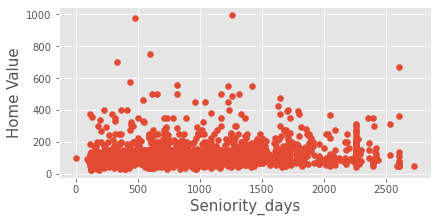

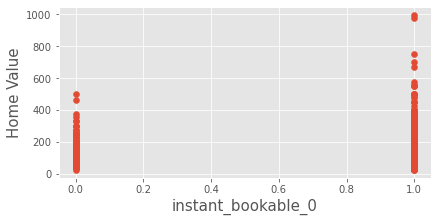

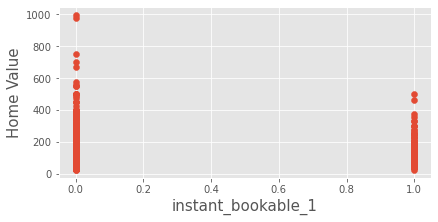

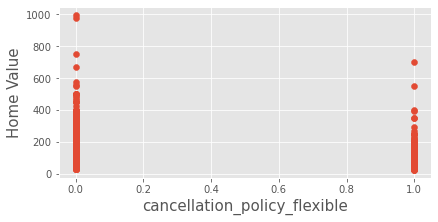

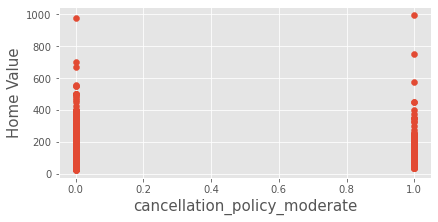

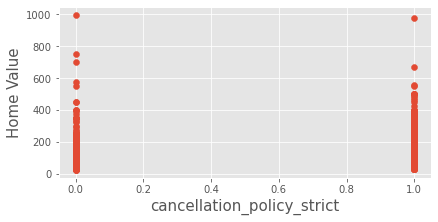

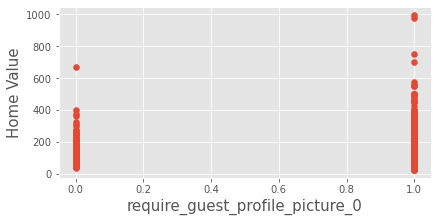

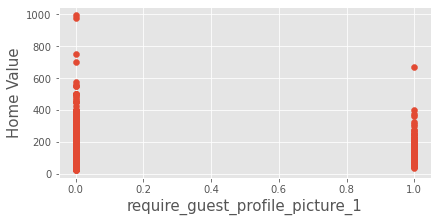

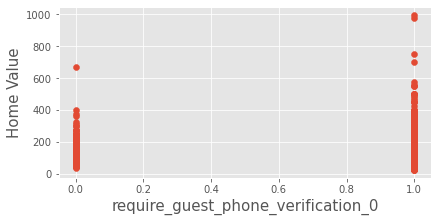

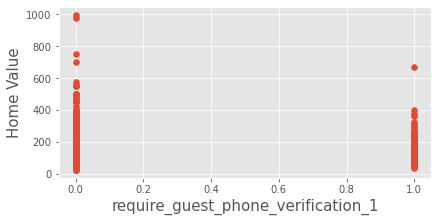

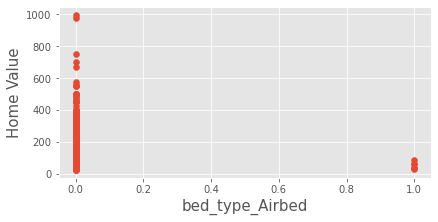

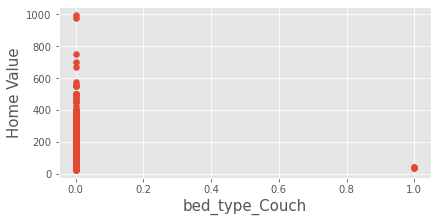

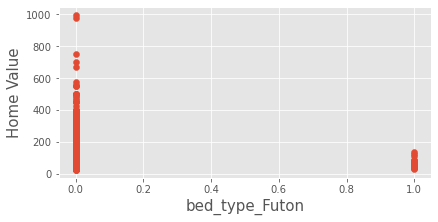

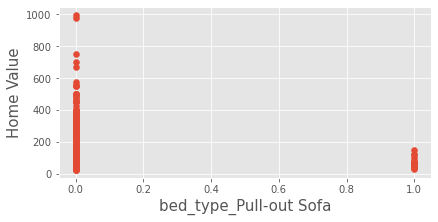

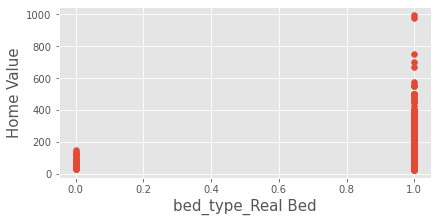

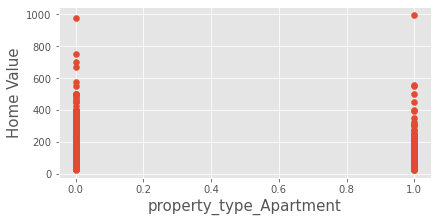

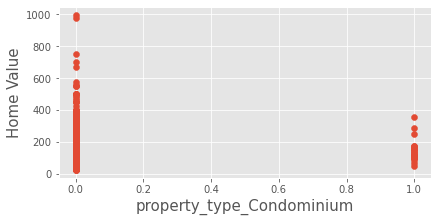

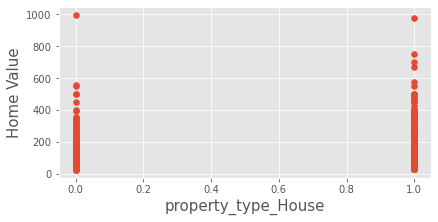

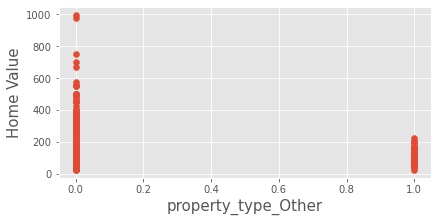

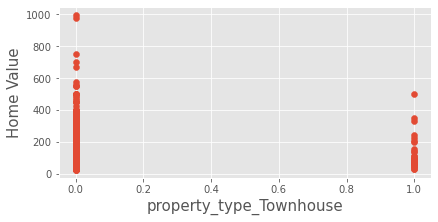

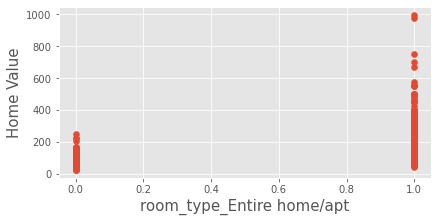

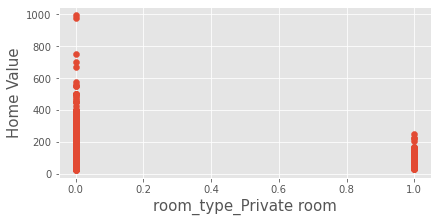

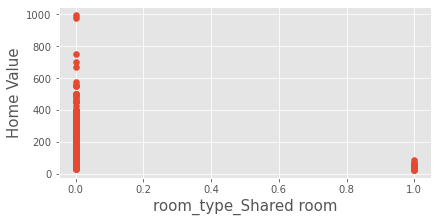

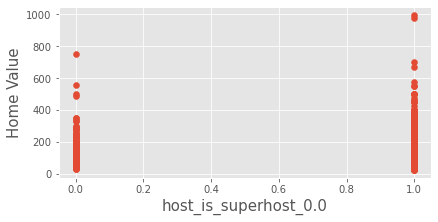

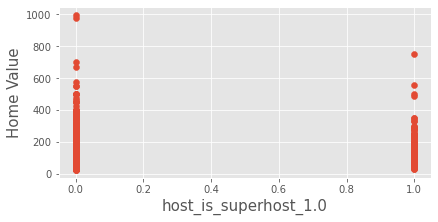

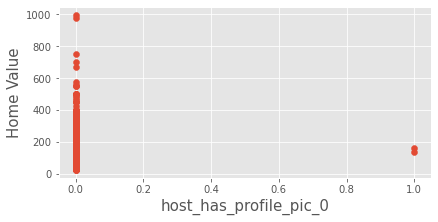

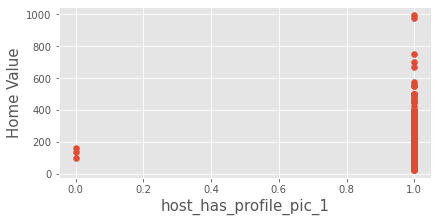

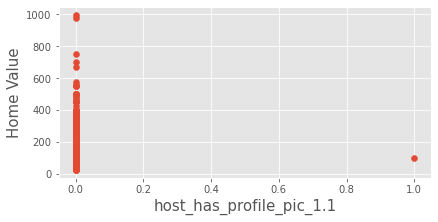

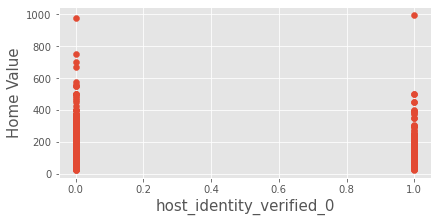

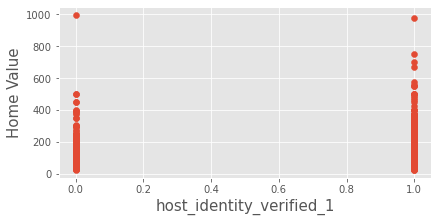

In [12]:
#Linear Relationship:  There should be a linear relationship between predictors and response variable
for index, feature_name in enumerate(features_df.columns):
    plt.figure(figsize=(6, 3))
    plt.scatter(features_df[feature_name], target_df.price)
    plt.ylabel('Home Value', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)   


<ipython-input-13-c3821818159c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 3))


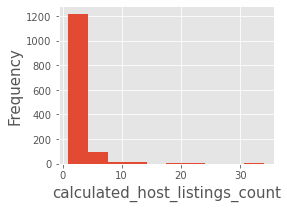

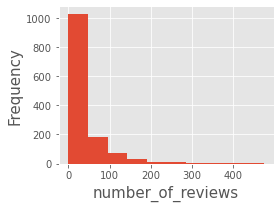

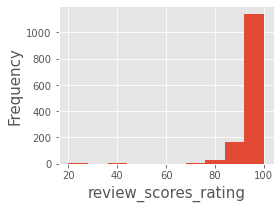

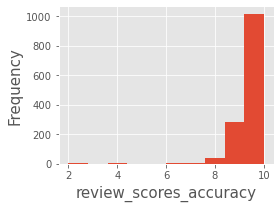

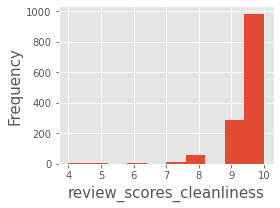

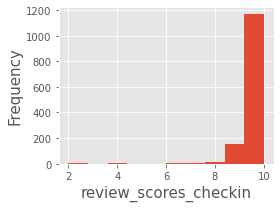

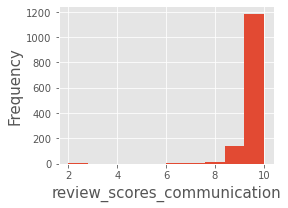

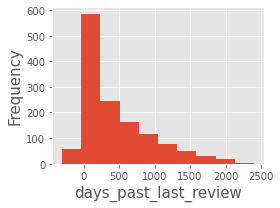

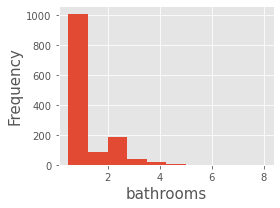

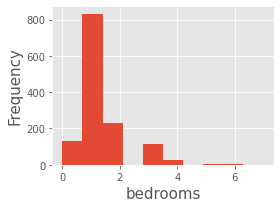

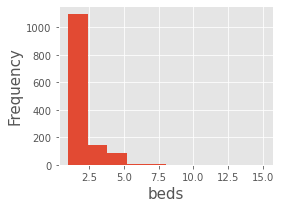

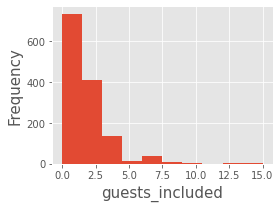

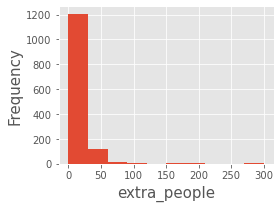

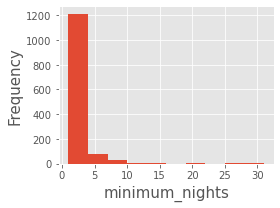

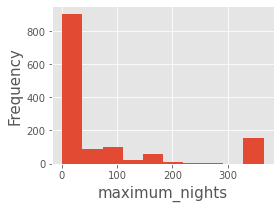

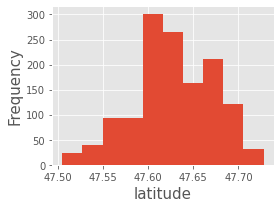

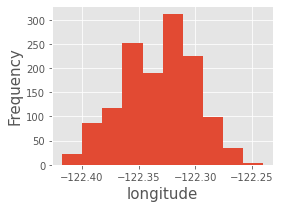

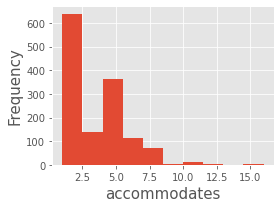

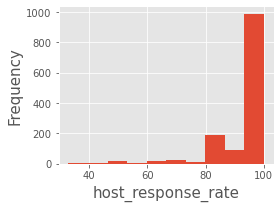

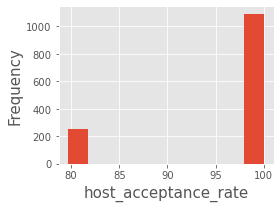

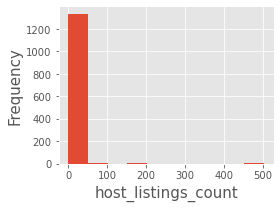

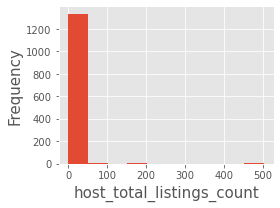

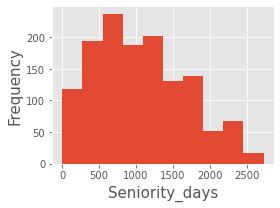

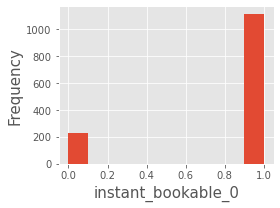

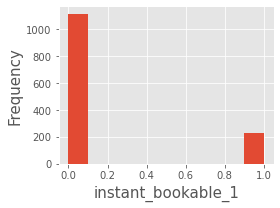

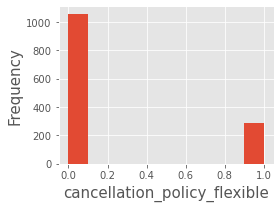

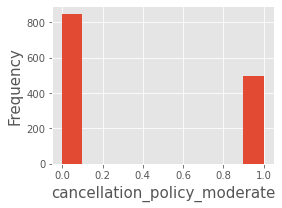

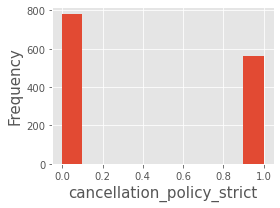

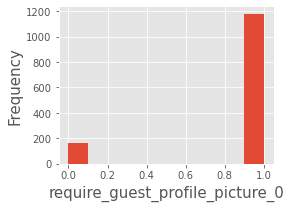

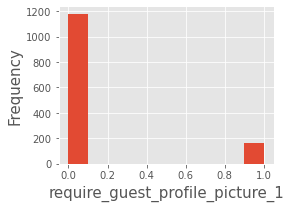

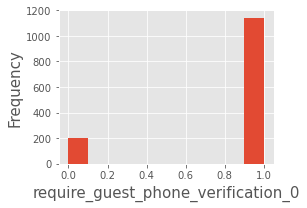

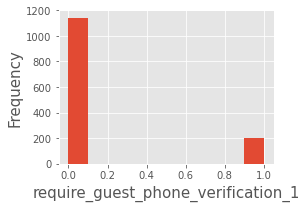

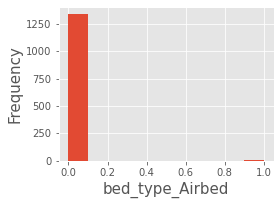

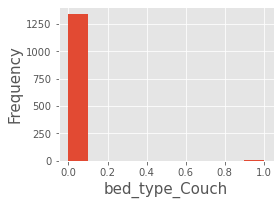

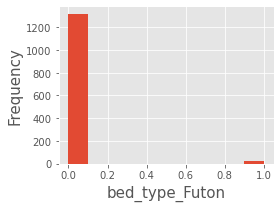

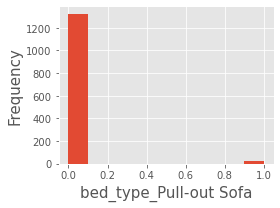

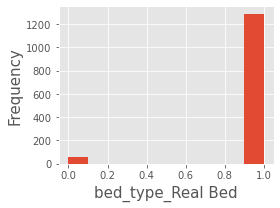

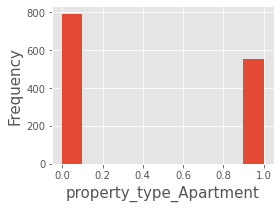

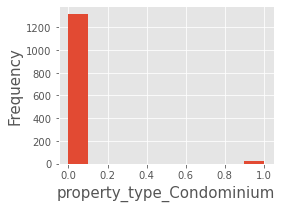

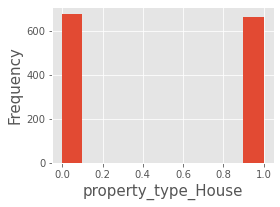

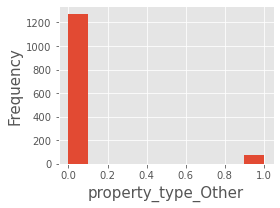

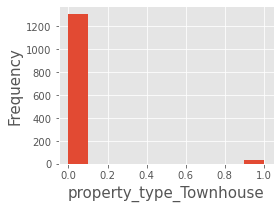

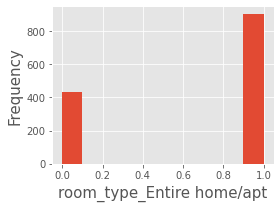

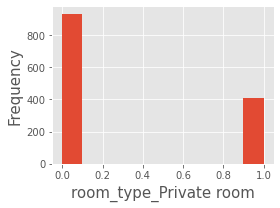

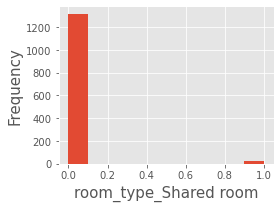

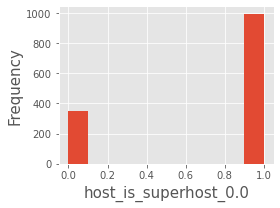

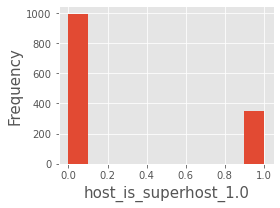

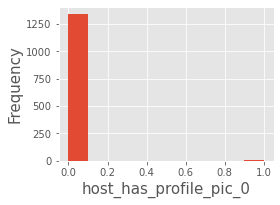

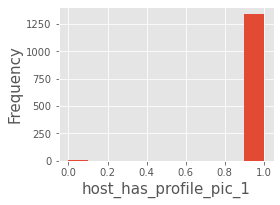

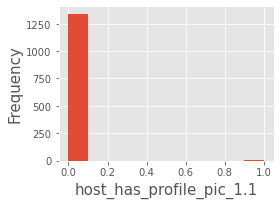

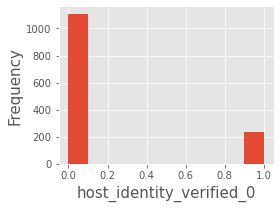

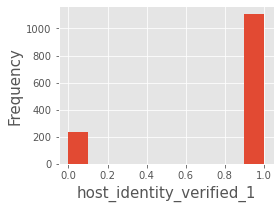

In [13]:
#Assess distribution of features
for index, feature_name in enumerate(features_df.columns):
    plt.figure(figsize=(4, 3))
    plt.hist(features_df[feature_name])
    plt.ylabel('Frequency', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

In [14]:
#Correlation between features and target is preferred
#Correlation between features is suspicious
corr_mat = data[['calculated_host_listings_count', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'days_past_last_review', 'bathrooms',
       'bedrooms', 'beds', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
       'accommodates', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'Seniority_days',
       'price']].corr()
corr_mat

,calculated_host_listings_count,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,days_past_last_review,bathrooms,bedrooms,...,maximum_nights,latitude,longitude,accommodates,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,Seniority_days,price
calculated_host_listings_count,1.000000,-0.000822,-0.080936,-0.096748,-0.053123,-0.082731,-0.101370,0.117593,0.122373,-0.025346,...,0.111060,-0.088999,0.115308,0.039300,0.073376,0.184340,0.196823,0.196898,0.226568,-0.035904
number_of_reviews,-0.000822,1.000000,0.012919,0.058844,0.046212,0.081451,0.066044,0.590237,-0.117589,-0.150927,...,0.034326,-0.028316,-0.029241,-0.134516,0.153770,0.230436,-0.051853,-0.051738,0.277856,-0.171698
review_scores_rating,-0.080936,0.012919,1.000000,0.614549,0.634263,0.561093,0.582885,-0.011758,0.012196,-0.029033,...,-0.025012,-0.011454,-0.058309,-0.074040,0.083350,0.033283,-0.070111,-0.070095,-0.001755,0.041287
review_scores_accuracy,-0.096748,0.058844,0.614549,1.000000,0.553659,0.401426,0.402591,-0.032726,-0.020820,-0.040496,...,-0.049993,0.015121,-0.050185,-0.090398,0.097237,0.045615,-0.094047,-0.094040,-0.070821,-0.006465
review_scores_cleanliness,-0.053123,0.046212,0.634263,0.553659,1.000000,0.314471,0.321239,-0.033742,-0.011942,-0.071624,...,0.014009,0.012392,-0.074818,-0.066386,0.133688,0.058394,-0.011868,-0.011855,-0.038918,0.011505
review_scores_checkin,-0.082731,0.081451,0.561093,0.401426,0.314471,1.000000,0.767672,0.050860,-0.034173,-0.032326,...,-0.033696,0.008853,-0.038078,-0.078950,0.087733,0.019892,-0.136275,-0.136269,-0.007704,-0.049818
review_scores_communication,-0.101370,0.066044,0.582885,0.402591,0.321239,0.767672,1.000000,0.034744,-0.042513,-0.044632,...,-0.028200,0.014358,-0.051240,-0.065832,0.102688,0.004055,-0.136505,-0.136499,-0.026725,-0.021365
days_past_last_review,0.117593,0.590237,-0.011758,-0.032726,-0.033742,0.050860,0.034744,1.000000,0.023786,-0.014429,...,0.274264,-0.019740,-0.017774,0.008379,0.086627,0.200252,0.011762,0.011910,0.583230,-0.046590
bathrooms,0.122373,-0.117589,0.012196,-0.020820,-0.011942,-0.034173,-0.042513,0.023786,1.000000,0.548896,...,0.087694,-0.002046,0.001425,0.462372,-0.024893,-0.045495,0.052560,0.052639,0.085724,0.461632
bedrooms,-0.025346,-0.150927,-0.029033,-0.040496,-0.071624,-0.032326,-0.044632,-0.014429,0.548896,1.000000,...,0.121989,0.045016,-0.045505,0.783776,-0.102193,-0.105272,0.015950,0.016196,0.080044,0.625383


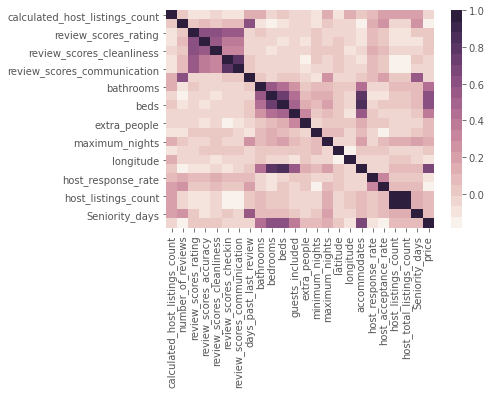

In [15]:
#Visualize corelations
ax=sns.heatmap(corr_mat,
               cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top;

In [16]:
#Partition the data
#Create training and test datasets
X = features_df
Y =  target_df

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1073, 52)
(269, 52)
(1073, 1)
(269, 1)


In [17]:
#UNIVARIATE SELECTION
# Feature Extraction with Univariate Statistical Tests (f_regression)

# load data
X = X_train
y = Y_train
names=pd.DataFrame(X_train.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(X, y)

print (results.scores_)
#print (results.pvalues_)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'],ascending=False)
final_columns = scored[scored.Score >1]
final_columns.sort_values(by=['Score'],ascending=False)

[1.05605068e+00 3.42940115e+01 9.14762398e-01 2.69285993e-04
 1.35437876e-01 9.81099131e-01 2.30646418e-01 1.17398571e+00
 3.35823986e+02 8.19724789e+02 6.67673154e+02 2.63239499e+02
 1.47560014e+01 8.89970574e+00 1.55654614e+01 1.84934021e-01
 1.26856430e+01 9.82400456e+02 7.55012913e+00 2.42028436e+01
 1.07177457e+01 1.07315400e+01 4.28026802e+00 1.23154591e-01
 1.23154591e-01 2.17767079e+01 1.79856411e+01 6.77488704e+01
 4.18018744e-02 4.18018744e-02 1.06584513e-02 1.06584513e-02
 3.20592592e+00 3.92370858e+00 9.68900647e+00 6.69674478e+00
 2.41236443e+01 3.88695235e+00 6.36339670e-01 7.77221226e+00
 6.46651135e+00 3.30825141e-02 2.51696797e+02 2.02711244e+02
 2.27116550e+01 2.16973233e+00 2.16973233e+00 1.62700565e-01
 2.62687302e-03 1.09494171e-01 4.16878665e-01 4.16878665e-01]


C:\Users\berge\anaconda3\envs\testenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Feature,Score
17,accommodates,982.400456
9,bedrooms,819.724789
10,beds,667.673154
8,bathrooms,335.823986
11,guests_included,263.239499
42,room_type_Entire home/apt,251.696797
43,room_type_Private room,202.711244
27,cancellation_policy_strict,67.748870
1,number_of_reviews,34.294011
19,host_acceptance_rate,24.202844


In [18]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features


X = X_train
y = Y_train
names=pd.DataFrame(X_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
#rfe_mod = RFE(lin_reg, 10, step=1) 
rfe_mod = RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame

#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]


#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()


                               Feature  Rank
2                 review_scores_rating     1
4            review_scores_cleanliness     1
5                review_scores_checkin     1
8                            bathrooms     1
9                             bedrooms     1
11                     guests_included     1
13                      minimum_nights     1
15                            latitude     1
16                           longitude     1
17                        accommodates     1
19                host_acceptance_rate     1
20                 host_listings_count     1
21           host_total_listings_count     1
23                  instant_bookable_0     1
24                  instant_bookable_1     1
25        cancellation_policy_flexible     1
26        cancellation_policy_moderate     1
27          cancellation_policy_strict     1
30  require_guest_phone_verification_0     1
31  require_guest_phone_verification_1     1
32                     bed_type_Airbed     1
33        

37

Text(0.5, 1.0, 'Home Values: Actual vs Predicted')

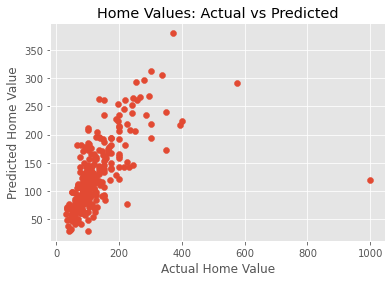

In [19]:
#Train regression model
lin_mod1 = LinearRegression()
lin_mod1.fit(X_train, Y_train)
#Create predictions using test features
Y_pred = lin_mod1.predict(X_test)
#Compare predicted and actual MEDV still based on train data
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Home Value")
plt.ylabel("Predicted Home Value")
plt.title("Home Values: Actual vs Predicted")

In [20]:
#Print model parameters
print('Intercept: \n', lin_mod1.intercept_)
print('Coefficidents: \n', lin_mod1.coef_)

Intercept: 
 [-18034.89272473]
Coefficidents: 
 [[-9.84638012e-01 -6.94451762e-02  1.40768672e+00  9.46399268e-01
   2.02993331e+00 -3.61531325e+00  2.21543782e-01  1.24169346e-03
   2.71225923e+01  2.68122047e+01  2.65761710e-01  3.72238343e+00
  -2.86525831e-02 -2.22095950e+00 -9.72481634e-03 -2.05995312e+01
  -1.55431461e+02  1.16342430e+01 -2.29039580e-01 -1.13378441e+00
  -2.21948296e+00  2.46776030e+00  3.05914861e-04  1.11481067e+00
  -1.11481067e+00 -4.44367700e+00 -4.01422011e+00  8.45789711e+00
  -1.29547731e+00  1.29547731e+00  2.46983004e+00 -2.46983004e+00
  -1.00877724e+00  1.02724181e+01 -8.33492681e+00 -6.00109152e-01
  -3.28604861e-01  8.60202906e+00  3.71721202e+00 -6.04054373e+00
   2.30270370e+00 -8.58140104e+00  3.37571128e+01  3.72217935e+00
  -3.74792922e+01 -2.48429293e+00  2.48429293e+00  4.06363647e+00
  -2.93628741e+00 -1.12734907e+00 -1.55893665e+00  1.55893665e+00]]


In [21]:
#Goodness of fit statistics: values closer to 0 are better
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 34.74021073369968
Mean Squared Error: 5078.968939637069
Root Mean Squared Error: 71.26688529490445


In [22]:
#Model statistics
#Ensure that constant is added: represets y-intercept
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     38.59
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.13e-178
Time:                        11:52:50   Log-Likelihood:                -5850.0
No. Observations:                1073   AIC:                         1.178e+04
Df Residuals:                    1031   BIC:                         1.199e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [23]:
#RESIDUAL ANALYSIS: CHECK FIT OF TRAINED MODEL
predictions = lin_mod1.predict(X_train) #make predictions with train data/use sklearn
residual=Y_train-predictions
residual.head()

,price
687,21.291024
1091,-30.816404
583,-63.256383
672,-18.480847
495,89.910038


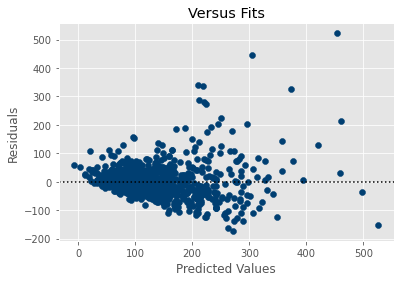

In [24]:
#RESIDUALS VS. FITS
plt.axhline(y=0, color='k', linestyle=':') #draw a black horizontal line when residuals equal 0

plt.scatter(predictions, residual, color='#003F72')
plt.title('Versus Fits')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

C:\Users\berge\anaconda3\envs\testenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

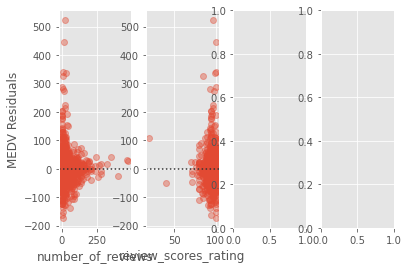

In [25]:
#Plot feature residuals vs. each feature
fig, ax=plt.subplots(1,4)
res_feat= X_train
ax[0]=sns.residplot('number_of_reviews',residual, res_feat, ax=ax[0], scatter_kws={'alpha':0.4})
ax[0].set_ylabel('MEDV Residuals')
ax[1]=sns.residplot('review_scores_rating',residual, res_feat, ax=ax[1], scatter_kws={'alpha':0.4})
ax[1].set_ylabel('')
#ax[2]=sns.residplot('',residual, res_feat, ax=ax[2], scatter_kws={'alpha':0.4})
#ax[2].set_ylabel('')
#ax[3]=sns.residplot('',residual, res_feat, ax=ax[3], scatter_kws={'alpha':0.4})
#ax[3].set_ylabel('')
#Plot feature residuals vs. each feature
#fig, ax=plt.subplots(1,4)
#ax[0]=sns.residplot('',residual, res_feat, ax=ax[0], scatter_kws={'alpha':0.4})
#ax[0].set_ylabel('MEDV Residuals')
#ax[1]=sns.residplot('',residual, res_feat, ax=ax[1], scatter_kws={'alpha':0.4})
#ax[1].set_ylabel('')
#ax[2]=sns.residplot('',residual, res_feat, ax=ax[2], scatter_kws={'alpha':0.4})
#ax[2].set_ylabel('')
#ax[3]=sns.residplot('',residual, res_feat, ax=ax[3], scatter_kws={'alpha':0.4})
#ax[3].set_ylabel('')

In [26]:
'calculated_host_listings_count', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'days_past_last_review', 
'bathrooms','bedrooms', 'beds','guests_included', 
'extra_people','minimum_nights', 'maximum_nights', 'accommodates', 
'host_response_rate', 'host_acceptance_rate','host_listings_count', 'host_total_listings_count', 
'Seniority_days'

'Seniority_days'

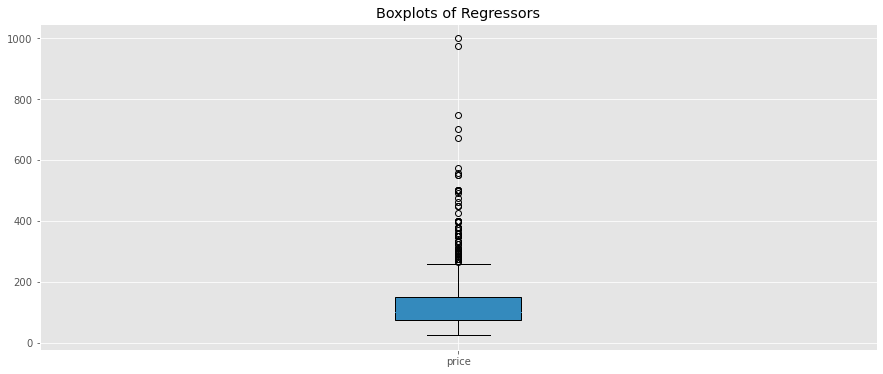

In [27]:
#Detect outliers
#Visualize outliers using boxplots
#I did not plot CHAS given it is binary
np.random.seed(10)
array1 = target_df['price']

data = [array1]
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
res = ax.boxplot(data, patch_artist=True)
plt.title('Boxplots of Regressors') 
ax.set_xticklabels(['price'])
plt.show()

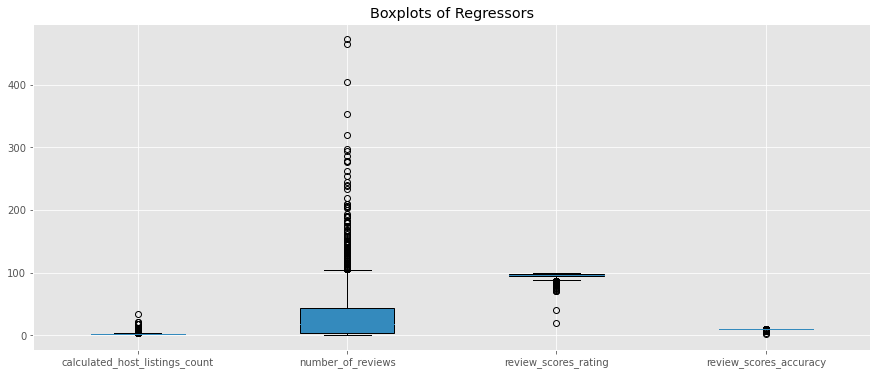

In [28]:
#Detect outliers
#Visualize outliers using boxplots
#I did not plot CHAS given it is binary
np.random.seed(10)
array1 = features_df['calculated_host_listings_count']
array2 = features_df['number_of_reviews']
array3 = features_df['review_scores_rating']
array4 = features_df['review_scores_accuracy']

data = [array1, array2, array3, array4]
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
res = ax.boxplot(data, patch_artist=True)
plt.title('Boxplots of Regressors') 
ax.set_xticklabels(['calculated_host_listings_count', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy'])
plt.show()

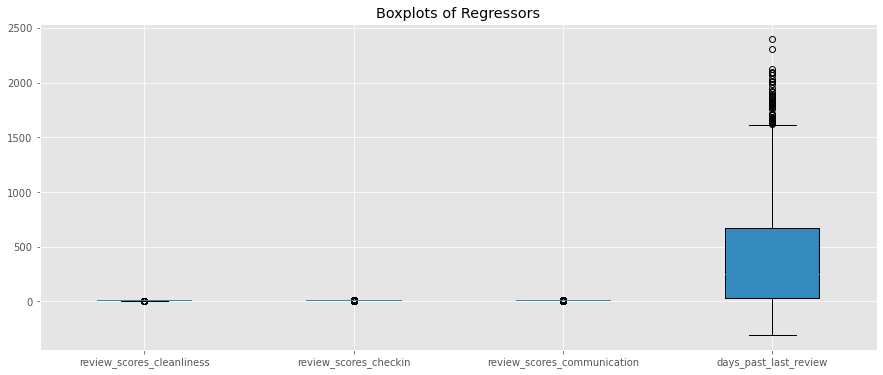

In [29]:
#I did not plot CHAS given it is binary
np.random.seed(10)
array5 = features_df['review_scores_cleanliness']
array6 = features_df['review_scores_checkin']
array7 = features_df['review_scores_communication']
array8 = features_df['days_past_last_review']

data = [array5, array6, array7, array8]
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
res = ax.boxplot(data, patch_artist=True)

plt.title('Boxplots of Regressors') 
ax.set_xticklabels(['review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'days_past_last_review'])

plt.show()

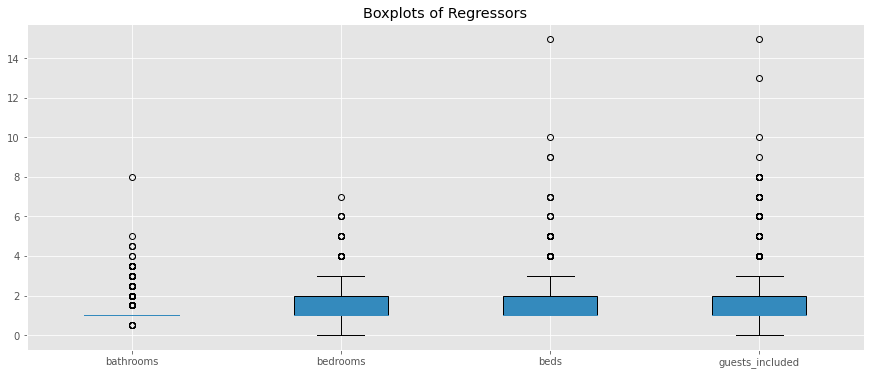

In [30]:
np.random.seed(10)
array9 = features_df['bathrooms']
array10 = features_df['bedrooms']
array11 = features_df['beds']
array12 = features_df['guests_included']

data = [array9, array10, array11, array12]
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
res = ax.boxplot(data, patch_artist=True)

plt.title('Boxplots of Regressors') 
ax.set_xticklabels(['bathrooms','bedrooms', 'beds','guests_included'])

plt.show()

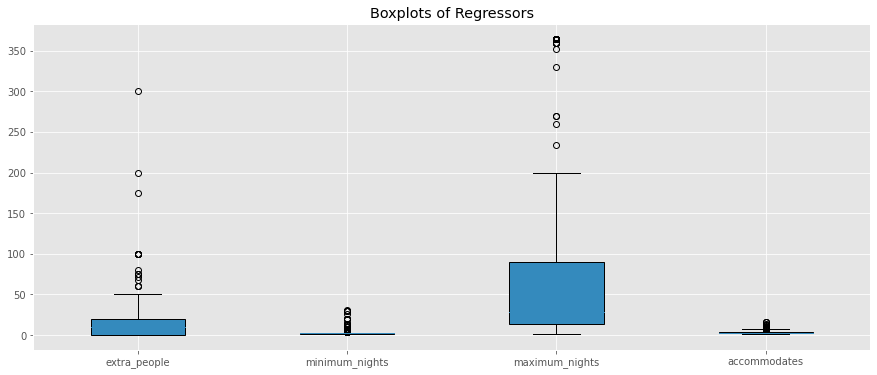

In [31]:
np.random.seed(10)
array13 = features_df['extra_people']
array14 = features_df['minimum_nights']
array15 = features_df['maximum_nights']
array16 = features_df['accommodates']

data = [array13, array14, array15, array16]
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
res = ax.boxplot(data, patch_artist=True)

plt.title('Boxplots of Regressors') 
ax.set_xticklabels(['extra_people','minimum_nights', 'maximum_nights', 'accommodates'])

plt.show()

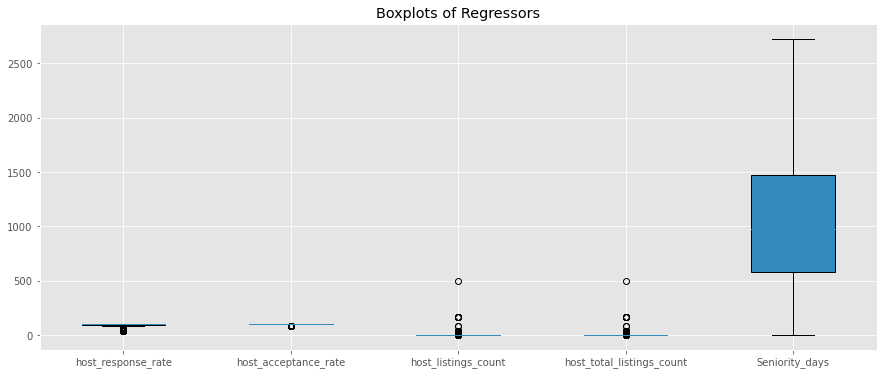

In [32]:
np.random.seed(10)
array17 = features_df['host_response_rate']
array18 = features_df['host_acceptance_rate']
array19 = features_df['host_listings_count']
array20 = features_df['host_total_listings_count']
array21 = features_df['Seniority_days']

data = [array17, array18, array19, array20, array21]
fig = plt.figure(1, figsize=(15, 6))
ax = fig.add_subplot(111)
res = ax.boxplot(data, patch_artist=True)

plt.title('Boxplots of Regressors') 
ax.set_xticklabels(['host_response_rate', 'host_acceptance_rate','host_listings_count', 'host_total_listings_count', 
                    'Seniority_days'])

plt.show()

In [33]:
#Outlier detection using z score

z = np.abs(stats.zscore(features_df))

#Define threshold for outliers
#1st array shows row number of outlier location
#2nd array shows column number of outlier location
threshold = 3
#print(np.where(z > 3))

In [34]:
#IQR method 
Q1 = features_df.quantile(0.25)
Q3 = features_df.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

In [35]:
#False is not outlier
#True is outlier
#print(features_df < (Q1 - 1.5 * IQR)) |(features_df > (Q3 + 1.5 * IQR))

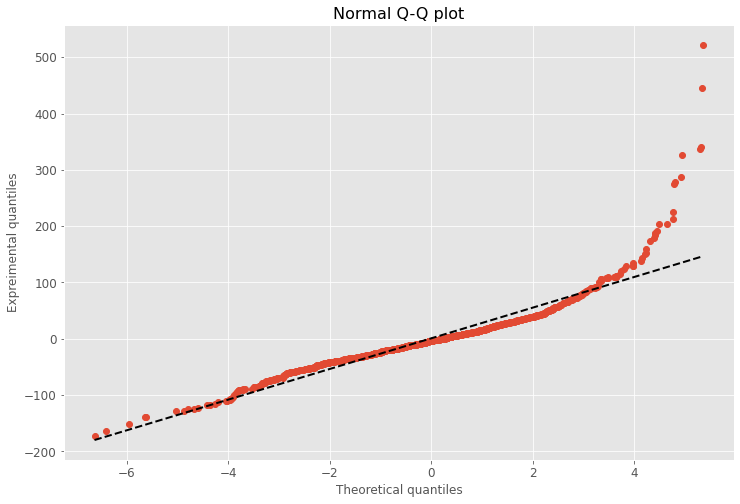

In [36]:
#Assess Q-Q plot

data=residual.values.flatten()
data.sort()
norm=random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0')
plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=16)
plt.xlabel("Theoretical quantiles", size=12)
plt.ylabel("Expreimental quantiles", size=12)
plt.tick_params(labelsize=12)
plt.show()

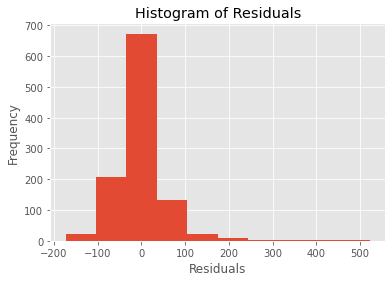

In [37]:
#HISTOGRAM OF RESIDUALS
x = residual

plt.title('Histogram of Residuals')
plt.hist(x, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Residuals')
plt.show()

In [38]:
#test for multicollinearity

X_std = StandardScaler().fit_transform(X_train)

#eigen vector of a correlation matrix
#Values close to 0 indicate multicollinearity

cor_mat1 = np.corrcoef(X_std)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [39]:


# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1).sort_values(by=['VIF Factor'],ascending=False)

C:\Users\berge\anaconda3\envs\testenv\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
26,inf,cancellation_policy_moderate
39,inf,property_type_House
29,inf,require_guest_profile_picture_1
30,inf,require_guest_phone_verification_0
31,inf,require_guest_phone_verification_1
32,inf,bed_type_Airbed
33,inf,bed_type_Couch
34,inf,bed_type_Futon
35,inf,bed_type_Pull-out Sofa
36,inf,bed_type_Real Bed
